<a href="https://colab.research.google.com/github/Davetepa/Talento_Tech_Files/blob/main/10_Notebook_APIs_Real_Time_(Temperatura%2C_otro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Se importan las librerias
import requests
import json
import pandas as pd

In [4]:
API_KEY = '58d2b5edb6c72ea2b6bab9f6700b684d'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [5]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 14.73°C


In [14]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '58d2b5edb6c72ea2b6bab9f6700b684d'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Bucaramanga', 'Medellin', 'Tunja','Barranquilla','Monteria','Leticia','Manizalez','Pereira','Armenia']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

Error: No se pudo obtener los datos del clima para Manizalez. Código de estado: 404
         Ciudad  Temperatura
0        Bogota        14.73
1   Bucaramanga        21.73
2      Medellin        18.84
3         Tunja         9.89
4  Barranquilla        25.88
5      Monteria        25.95
6       Leticia        22.03
7       Pereira        15.67
8       Armenia        15.80


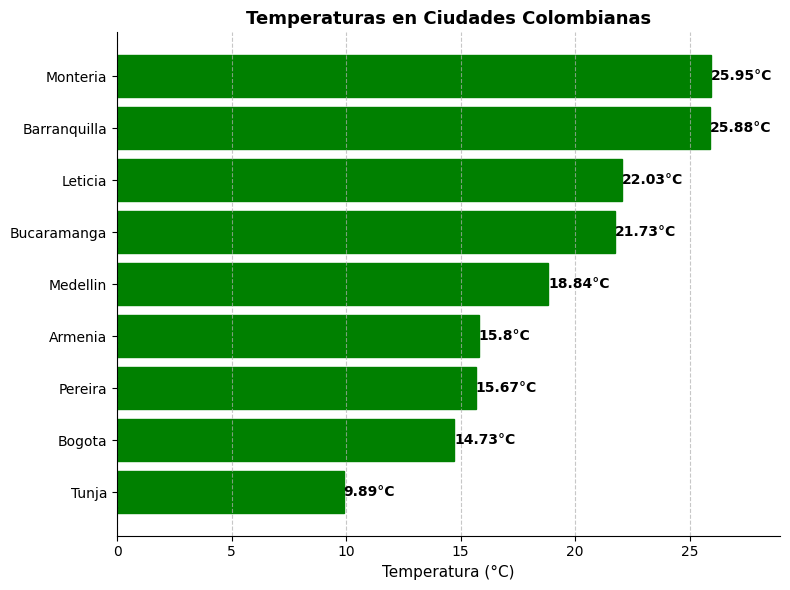

In [16]:
import matplotlib.pyplot as plt

datos_temperatura_ordenados = sorted(datos_temperatura, key=lambda x: x['Temperatura'], reverse=False)

ciudades = [dato['Ciudad'] for dato in datos_temperatura_ordenados]
temperaturas = [dato['Temperatura'] for dato in datos_temperatura_ordenados]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(ciudades, temperaturas, color='green', edgecolor='green')

ax.set_xlabel('Temperatura (°C)', fontsize=11)
ax.set_title('Temperaturas en Ciudades Colombianas', fontsize=13, fontweight='bold')
ax.tick_params(axis='y', labelsize=10)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width}°C',
            ha='left', va='center', fontweight='bold', fontsize=10)

plt.xlim(0, max(temperaturas) + 3)

ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()